In [1]:
from google.colab import drive
from google.colab import files
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt 
import numpy as np

drive.mount('/content/drive')
data = np.load('/content/drive/My Drive/Colab Notebooks/data.npy') 

Mounted at /content/drive


In this assignment, you will need to use the given "data.npy" fille to:


1)  visualize a single channel intensity data (as a 300x300 grid analog of intensity data on a map) using your own color space (15pt)

2)  filter the raw data with an average convolution (you can use a filter of 1/9[1, 1, 1; 1, 1, 1; 1, 1, 1]) and visualize the varied version (5pt) 



Your output/submission should include your code and the pair of raw and filtered images.

In [2]:
# create single channel, white to red
colorMin = 0
colorMax = 255
colorIndex = np.arange(colorMin, colorMax, 1).tolist()
rgb = [[i,0,0] for i in colorIndex]
rgb = np.array(rgb)/255.
colorMap = ListedColormap(rgb)
colorMap

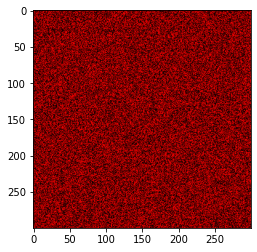

In [3]:
# As for Assignment 1, you can plot the data using matplotlib's imshow() function.
plt.imshow(data, cmap = colorMap) 
plt.show()

# You can use these two lines as a reference to download your images. 
# plt.savefig('data.png')
# files.download("data.png") 

In [4]:
def convolve2d(img, kernel):
    newShape = kernel.shape + tuple(np.subtract(img.shape, kernel.shape) + 1)
    strd = np.lib.stride_tricks.as_strided
    subMatrices = strd(img, shape = newShape, strides = img.strides * 2)
    return np.einsum('ij,ijkl->kl', kernel, subMatrices) 

In [5]:
filter = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
filtered_data = convolve2d(data, filter) / 9
filtered_data

array([[0.61268468, 0.47545039, 0.33177338, ..., 0.36560847, 0.45927632,
        0.57255483],
       [0.59498246, 0.54722288, 0.38408947, ..., 0.48779566, 0.50147396,
        0.59707679],
       [0.56581574, 0.50032931, 0.48068435, ..., 0.64646982, 0.66287427,
        0.65632265],
       ...,
       [0.63108448, 0.55921834, 0.54696187, ..., 0.61327372, 0.57314121,
        0.50433549],
       [0.50893963, 0.53557135, 0.58517543, ..., 0.54437901, 0.52005476,
        0.43256511],
       [0.63761789, 0.59111449, 0.48876134, ..., 0.53785048, 0.39757573,
        0.34713205]])

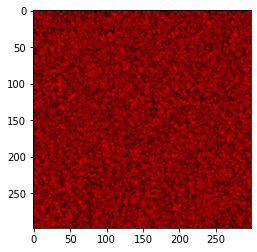

In [6]:
plt.imshow(filtered_data, cmap = colorMap) 
plt.show()